In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def wolfram_ca(rule: int, initial: np.ndarray, steps: int) -> np.ndarray:
    """
    Compute elementary cellular automata.
    
    Parameters
    ----------
    rule : int
        The rule to be applied (0-255 inclusive) in base 10
    initial : np.ndarray
        The top row to begin from
    steps : int
        The number of generations to compute
        
    Returns
    -------
    np.ndarray
        An array of shape len(initial) x steps for the computed cellular
        automata
    """
    rule = bin(rule)[2:].zfill(8)
    states = []

    def _pad(state):
        return np.concatenate([[0], state, [0]])

    state = initial
    states.append(state.astype(int))
    for _ in range(steps):
        new_state = np.zeros(len(state))
        for i in range(len(state)):
            triplet = _pad(state)[i : i + 3]
            triplet_int = int("".join(triplet.astype(int).astype(str)), 2)
            new_state[i] = int(rule[::-1][triplet_int])
        state = new_state
        states.append(state.astype(int))

    return np.array(states)

In [3]:
def plot_ca(states, rule):
    fig, ax = plt.subplots(figsize=(int(states.shape[1] / 2), int(states.shape[0]) / 2))
    ax.imshow(states, cmap="Greys")
    ax.set_xticks(np.arange(0, states.shape[1], 1))
    ax.set_yticks(np.arange(0, states.shape[0], 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks(np.arange(-0.5, states.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, states.shape[0], 1), minor=True)
    ax.grid(which="minor", color="grey", linestyle="-", linewidth=2)
    ax.set_title(f"Rule {rule}", size=24)
    return ax

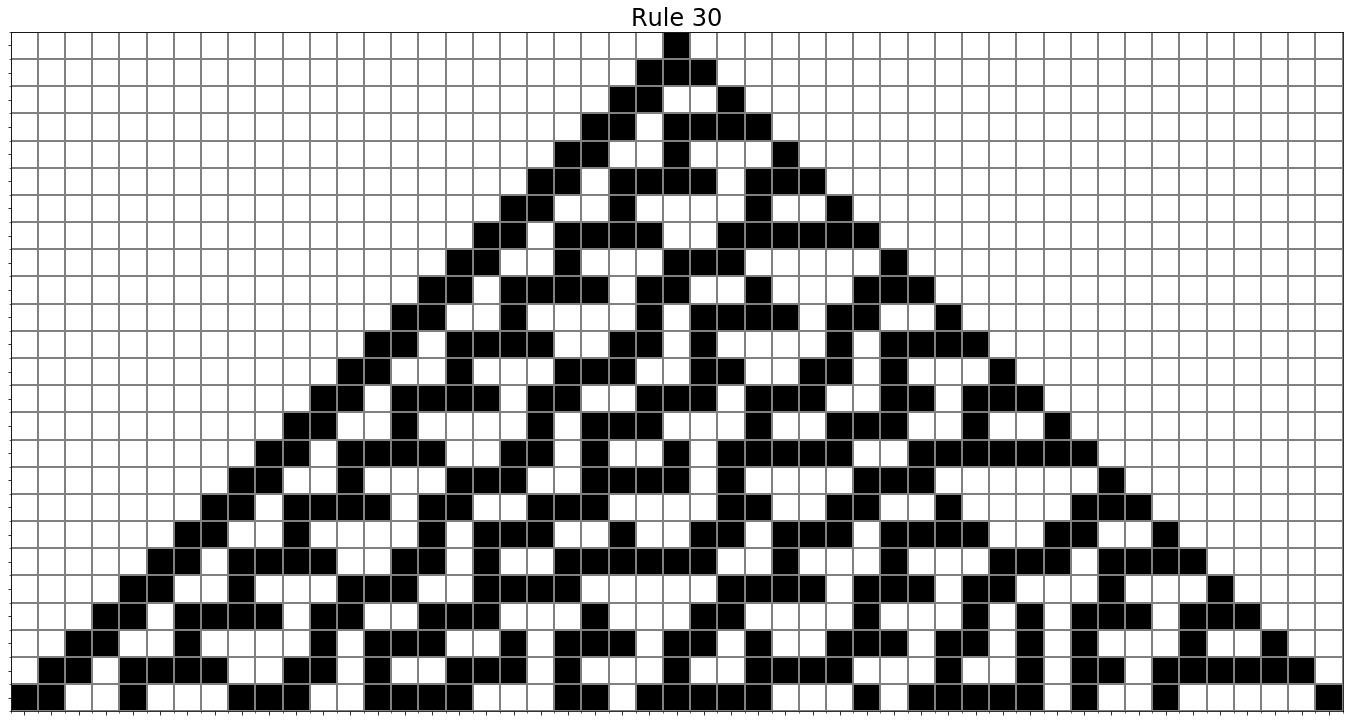

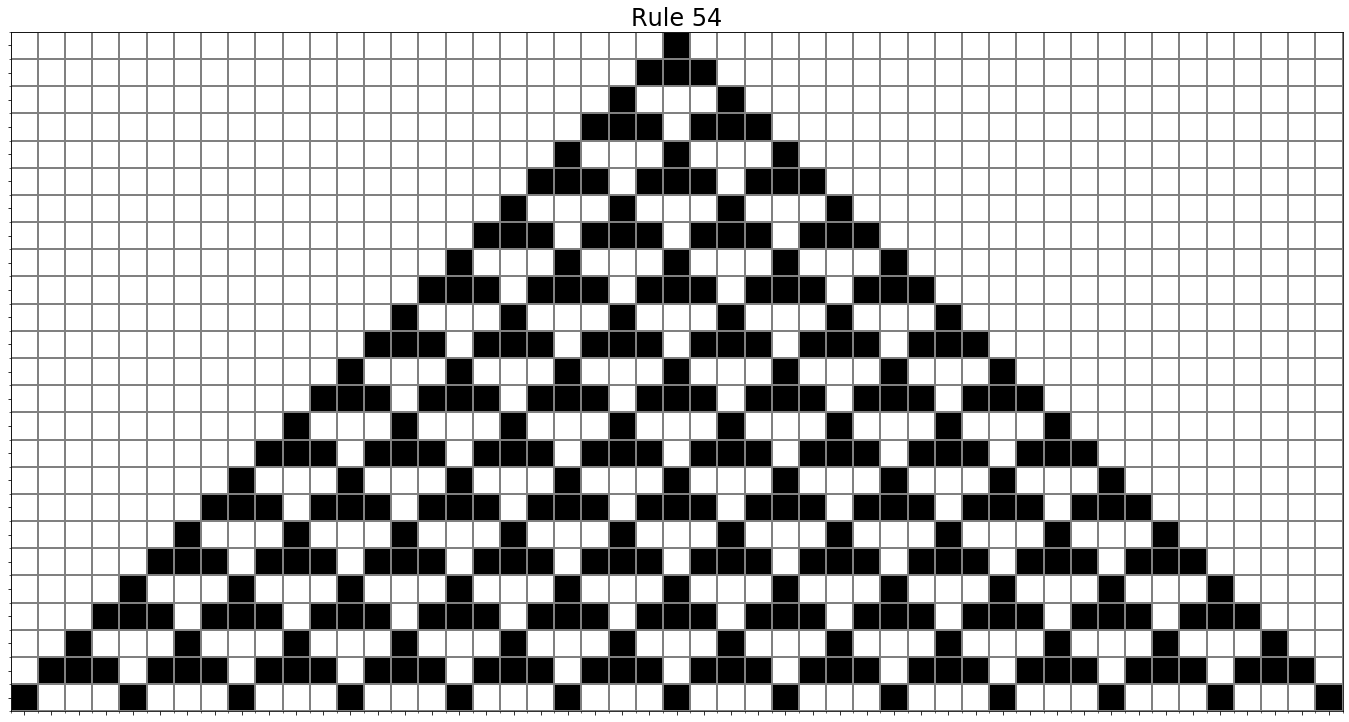

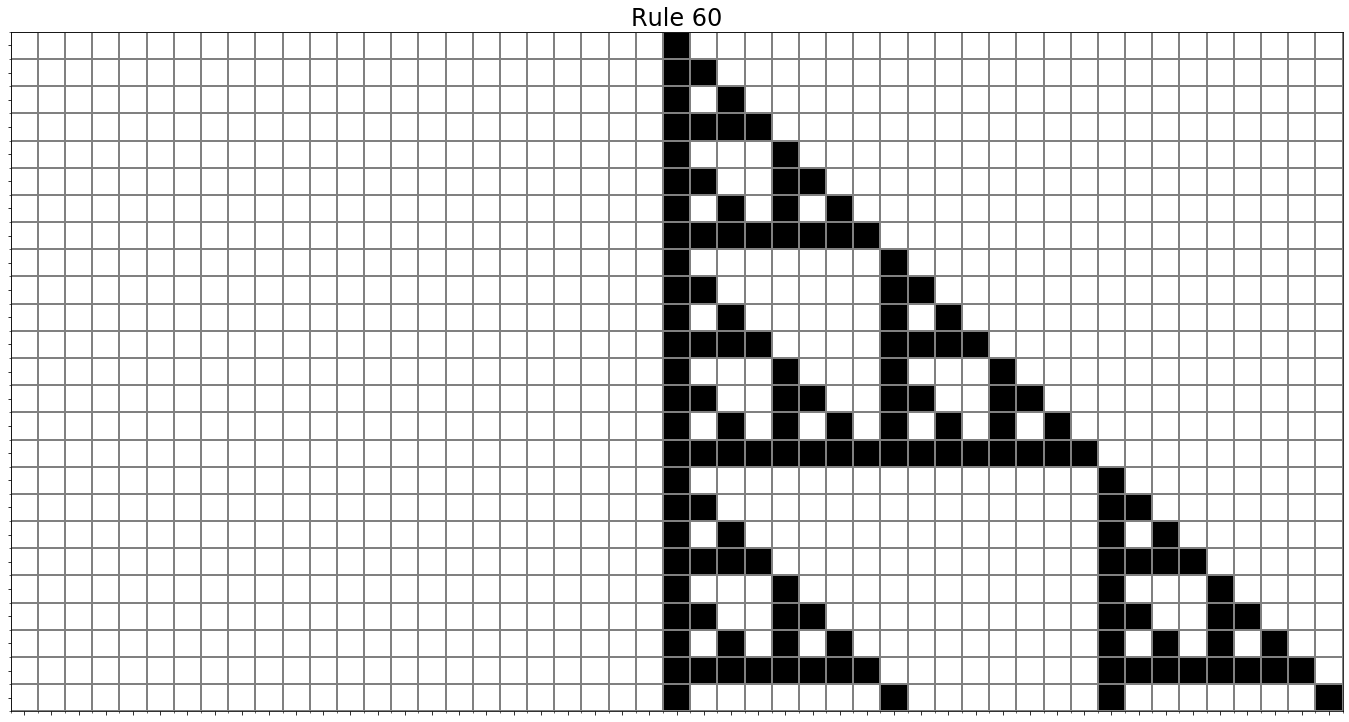

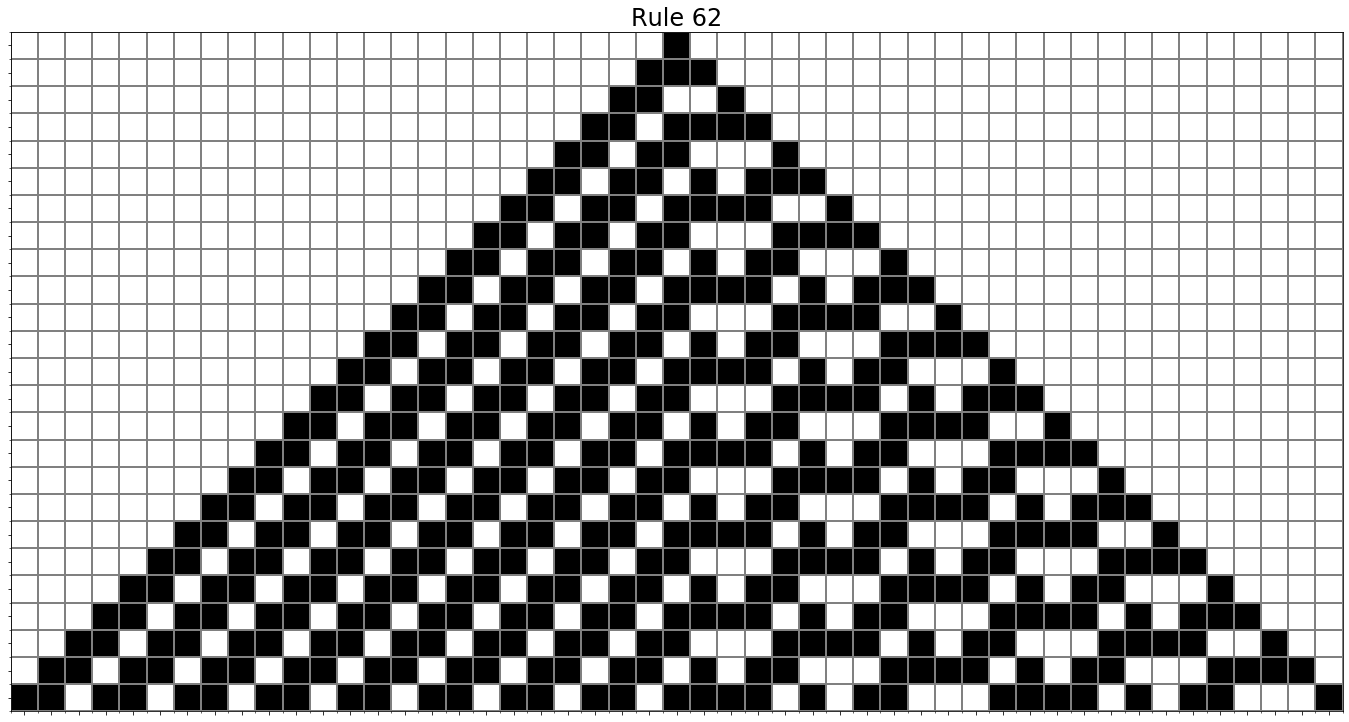

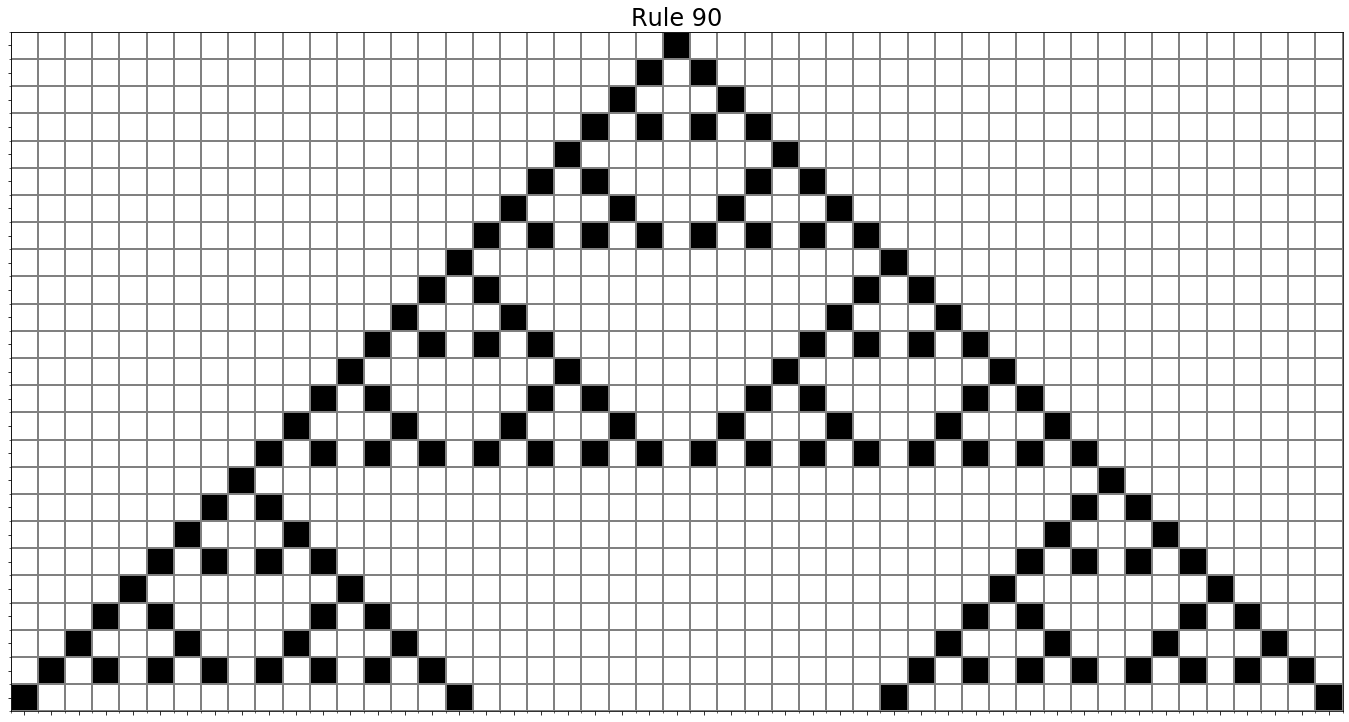

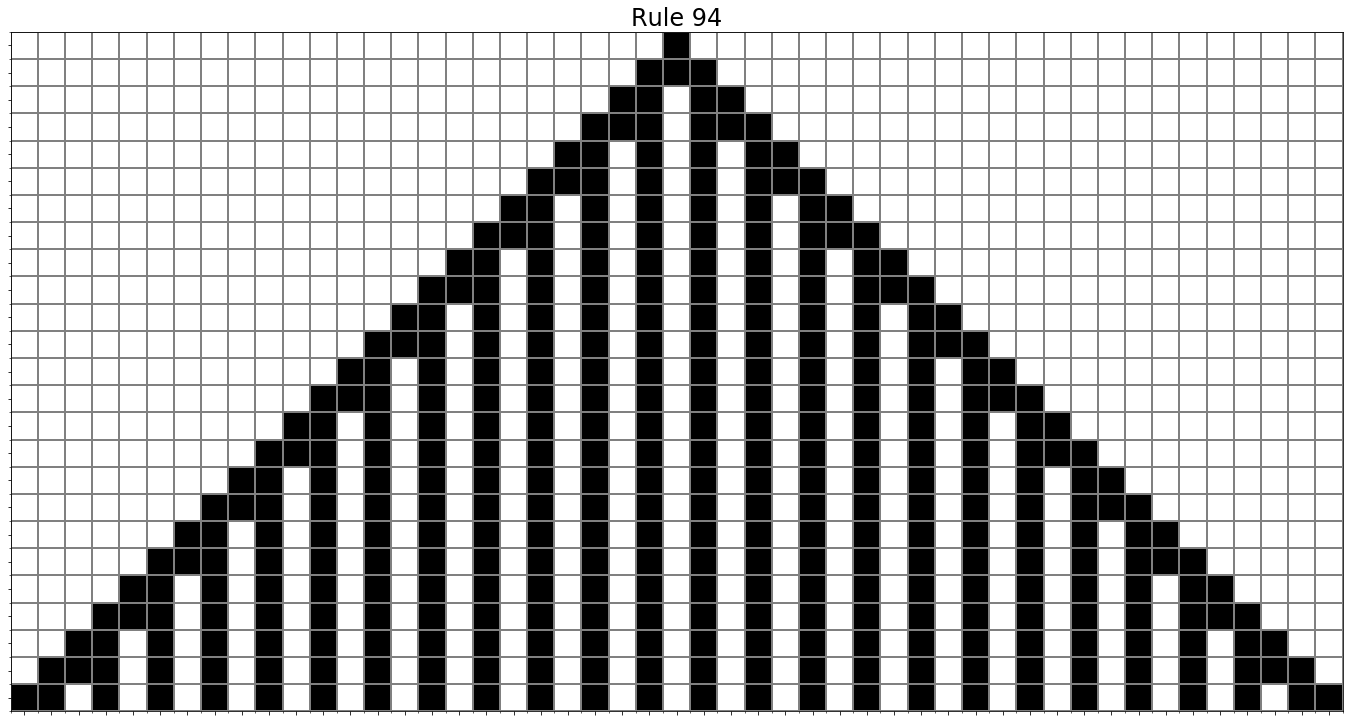

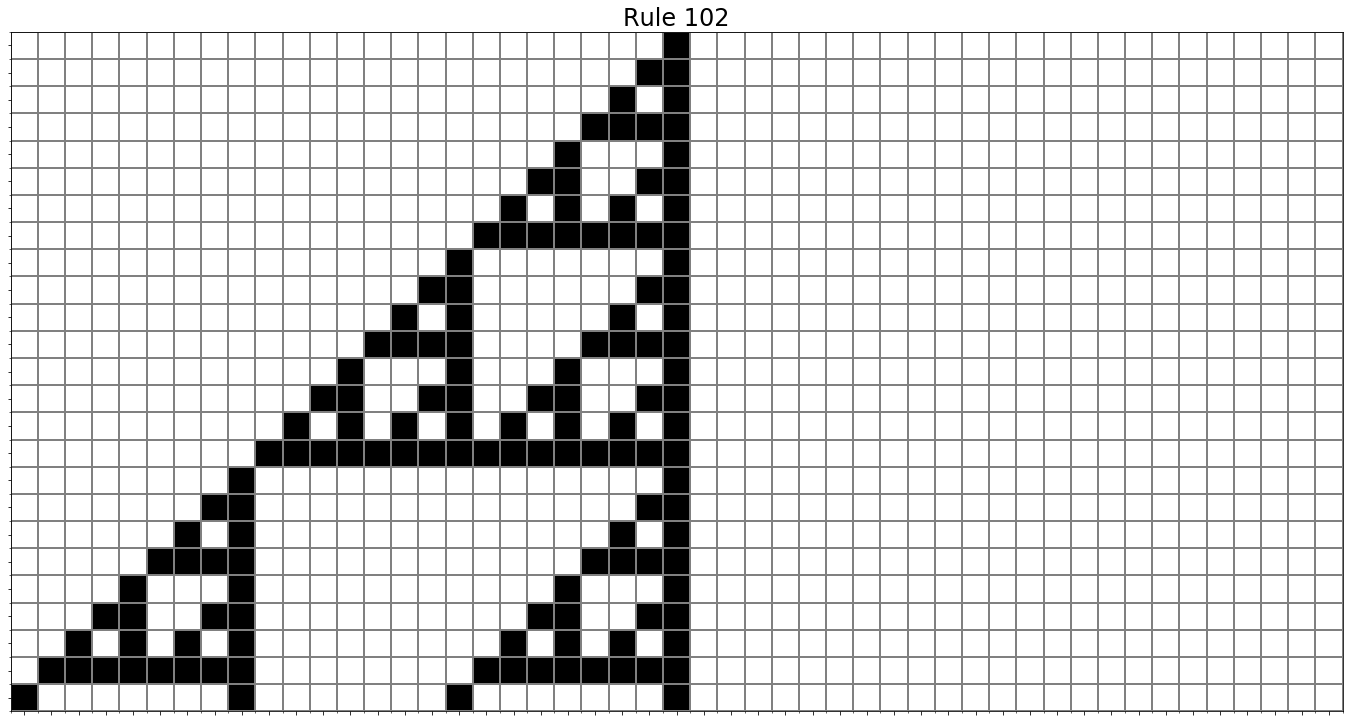

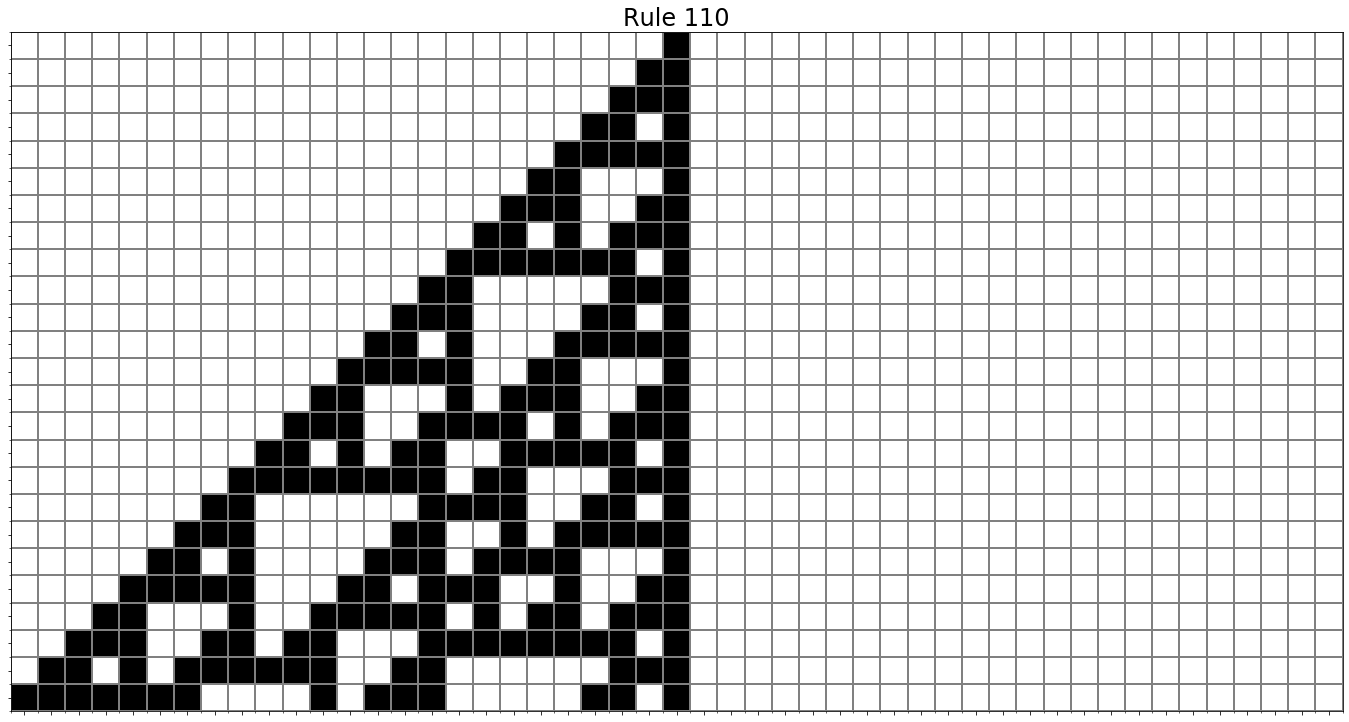

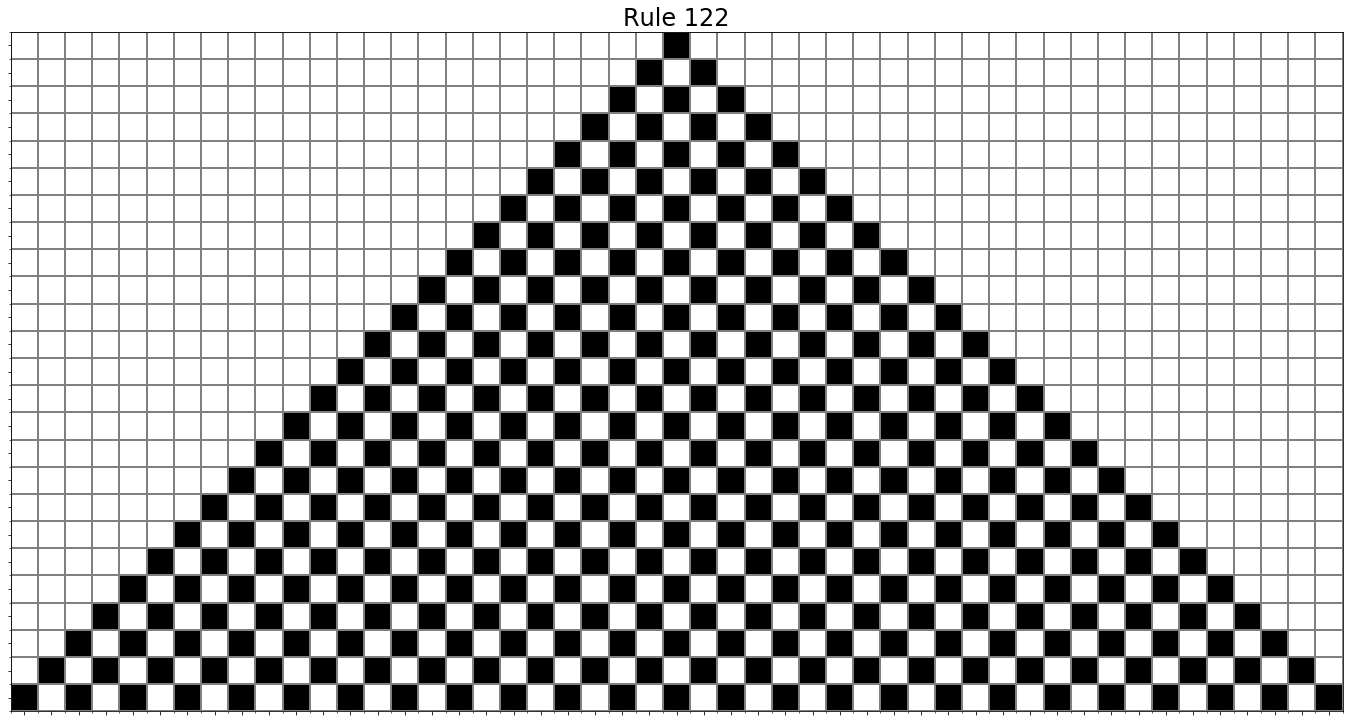

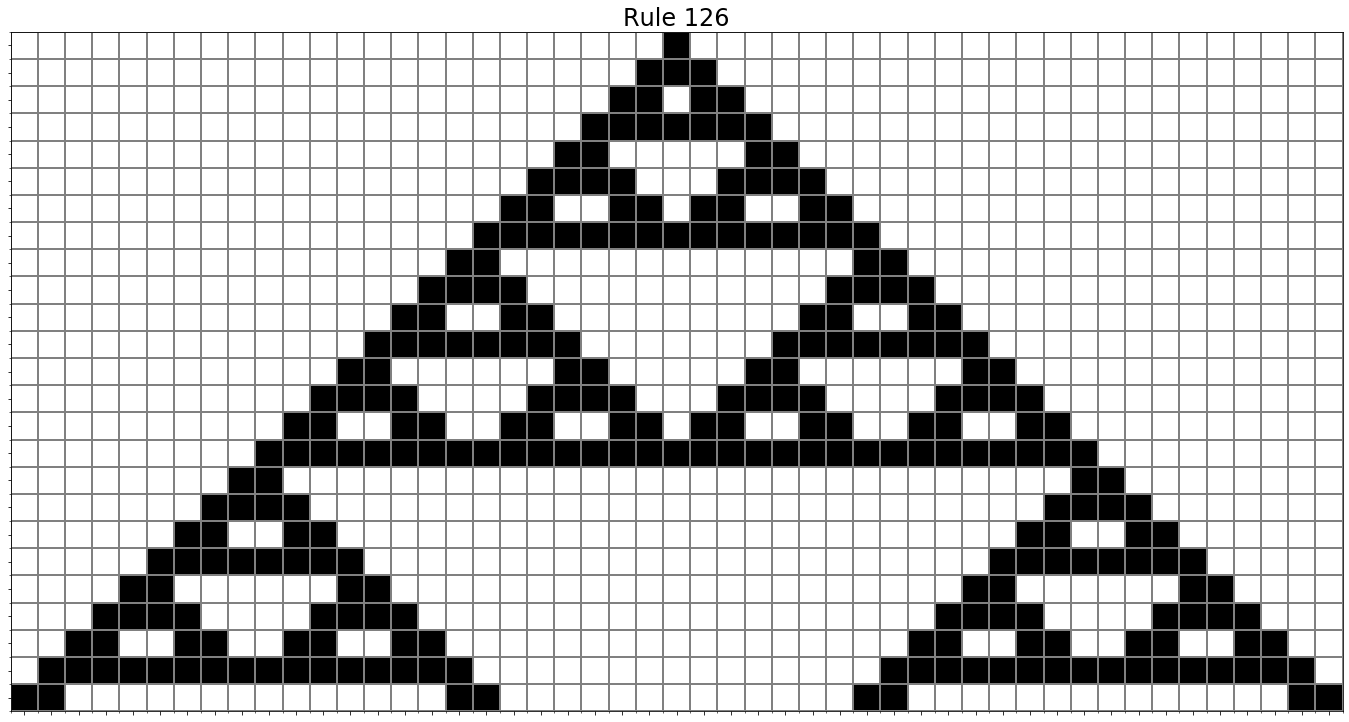

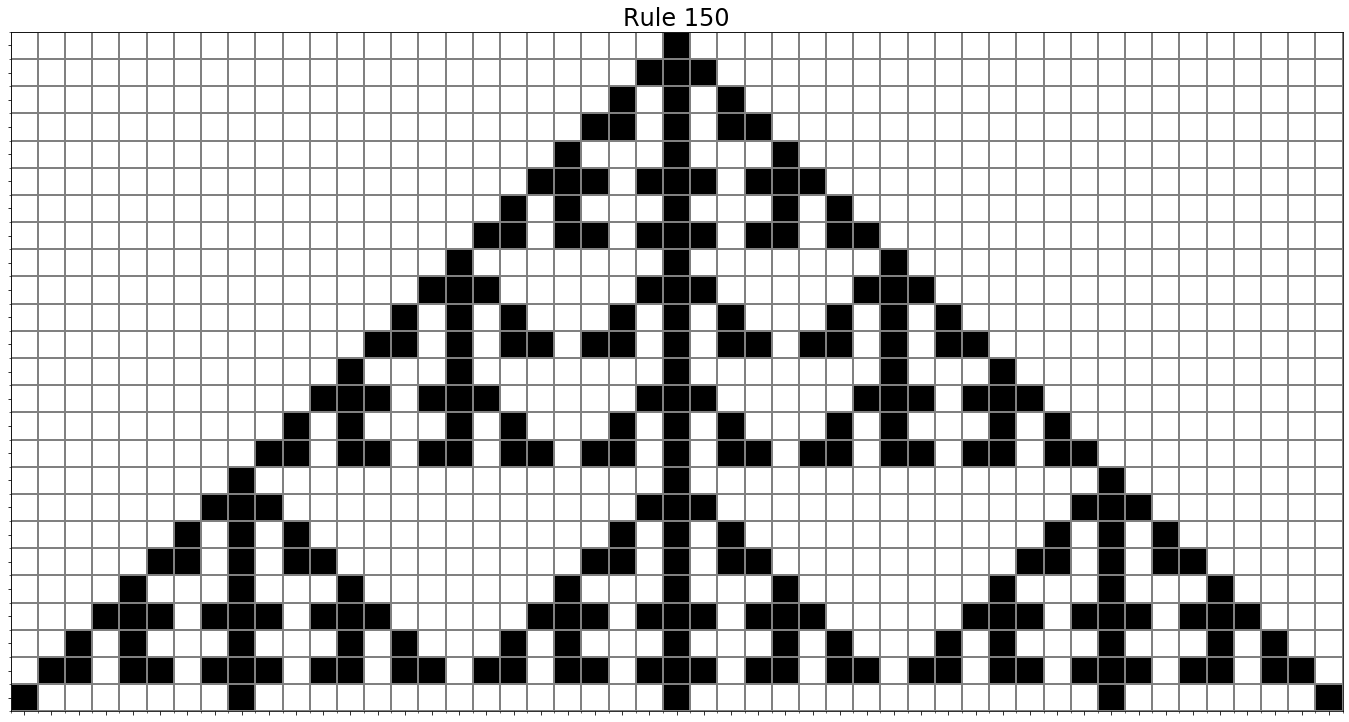

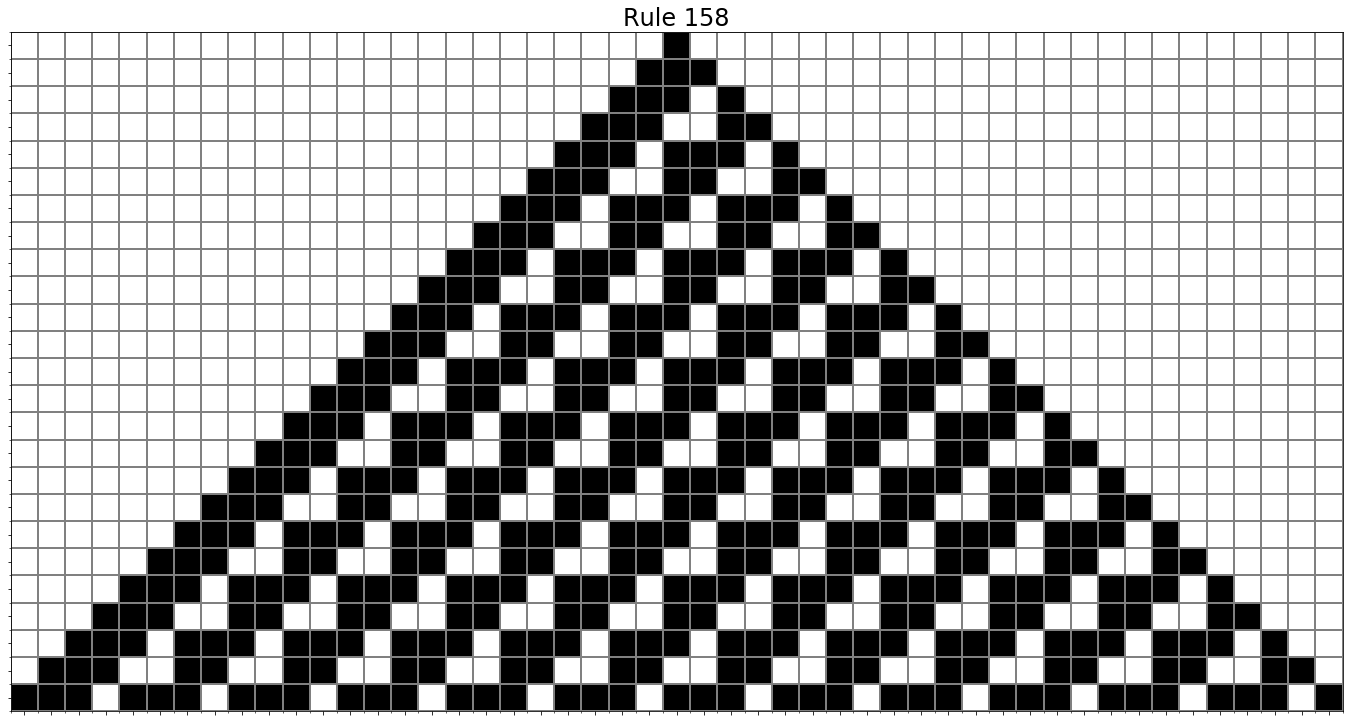

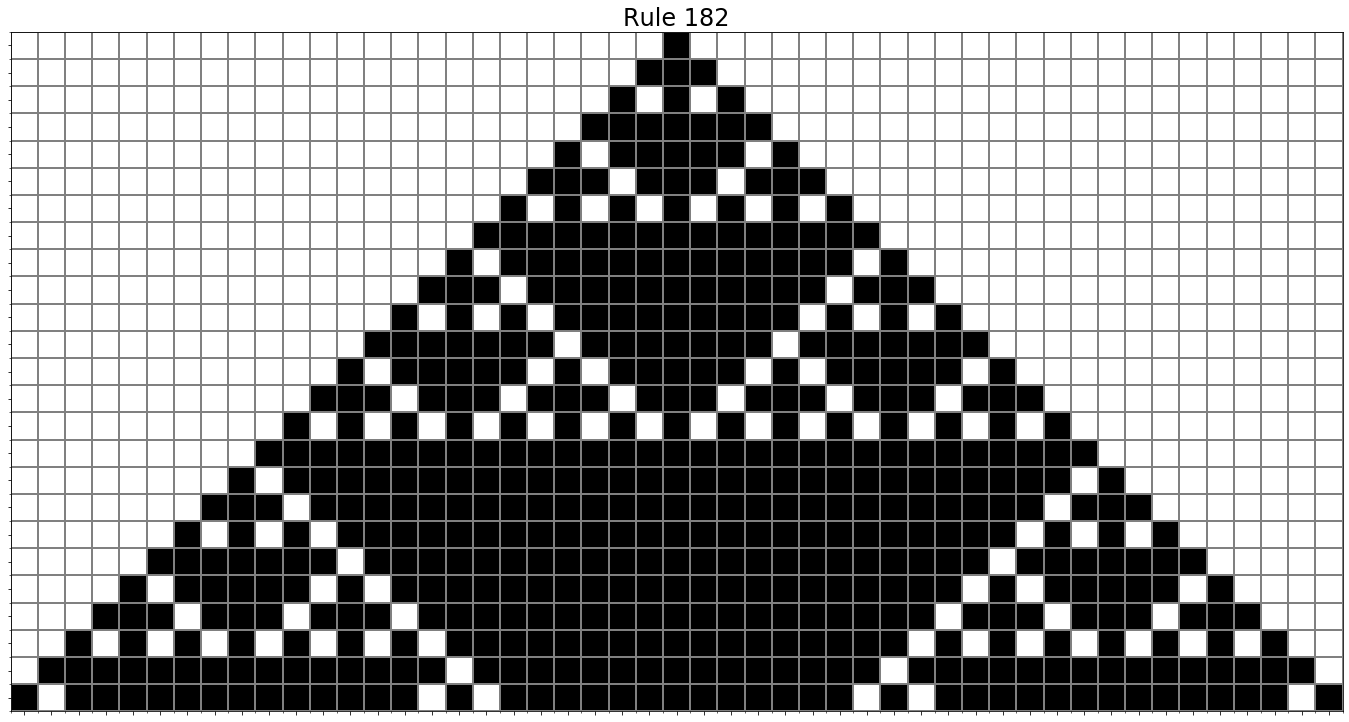

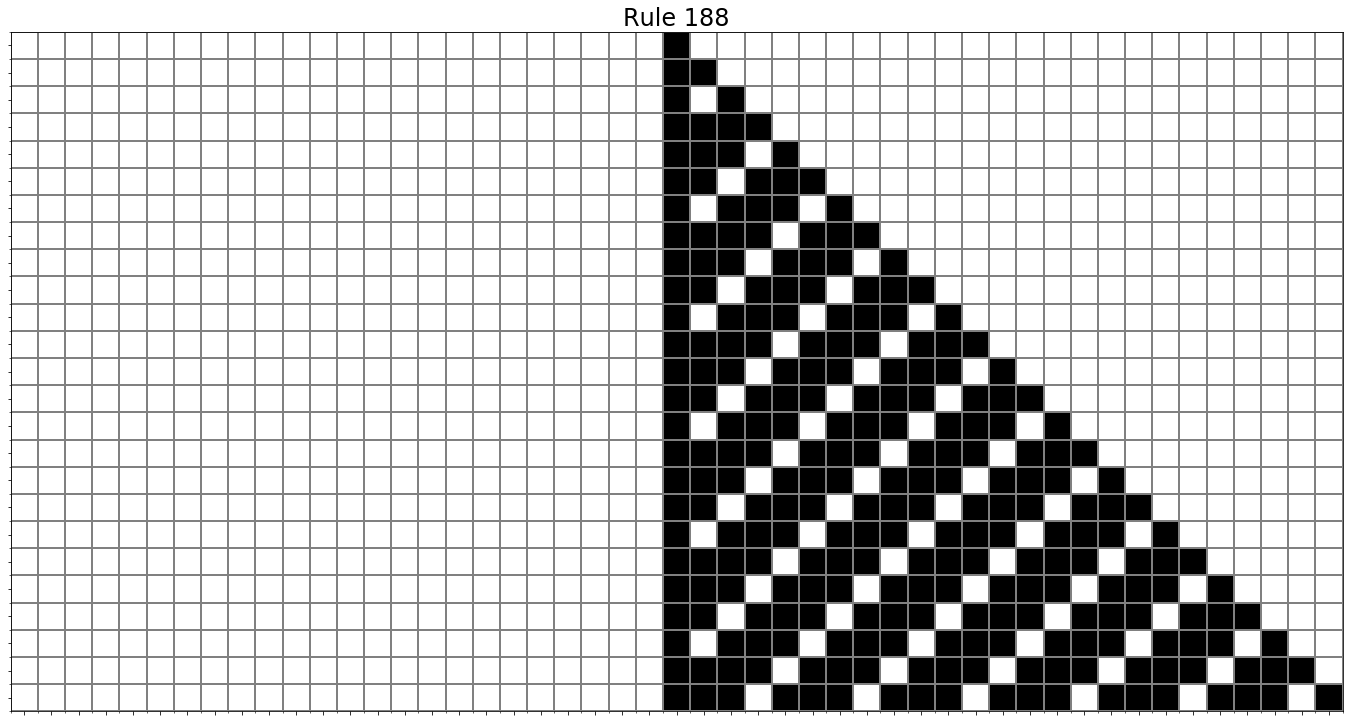

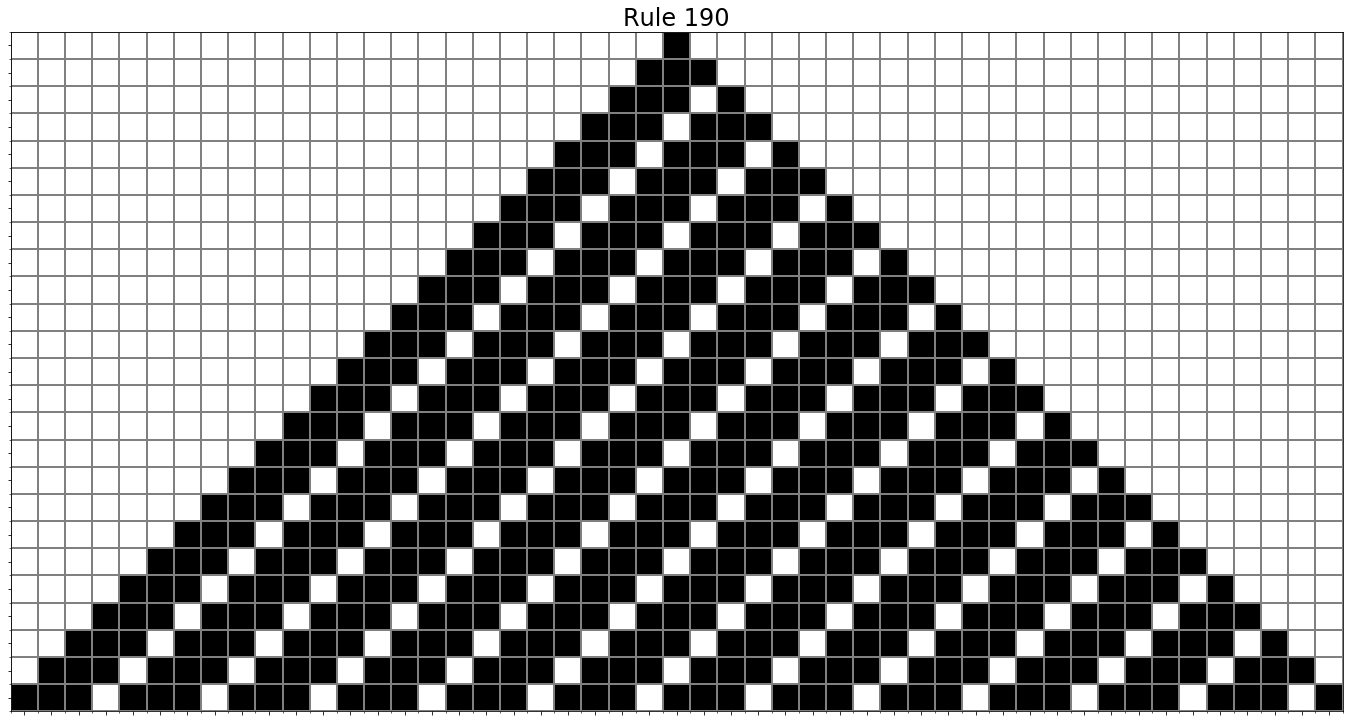

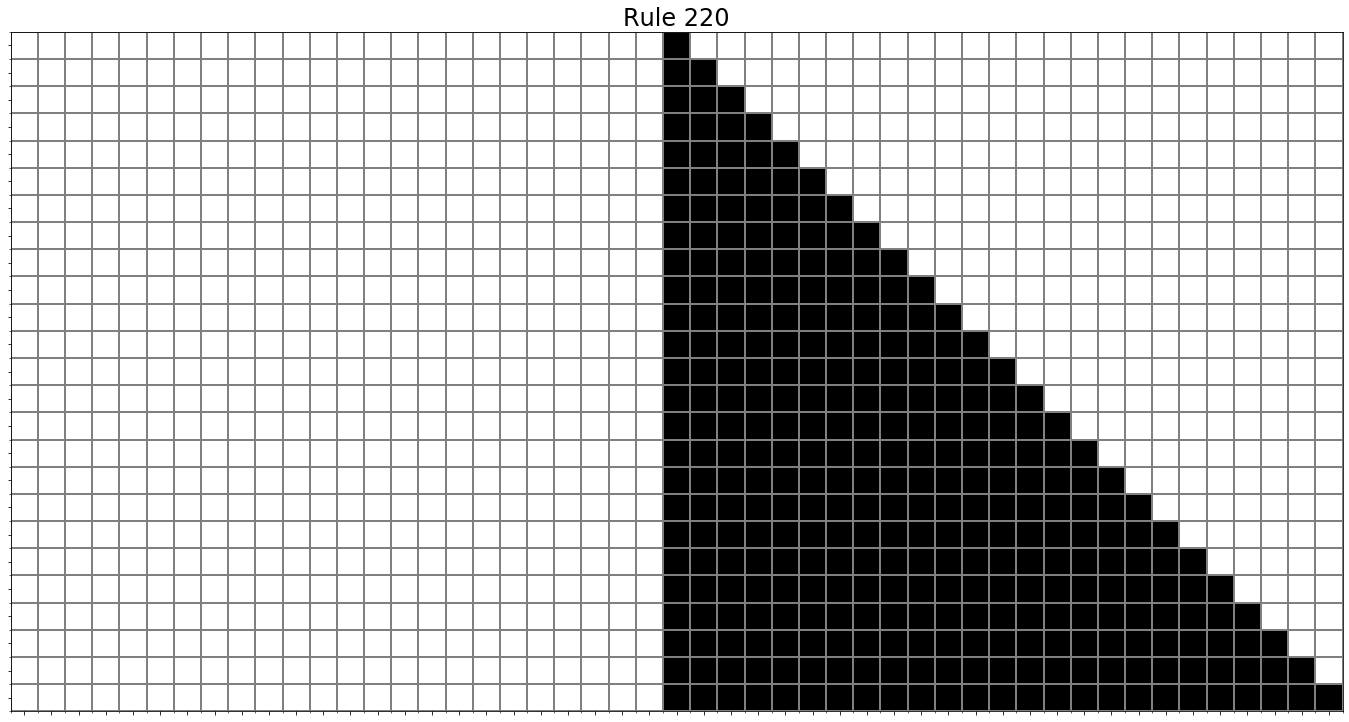

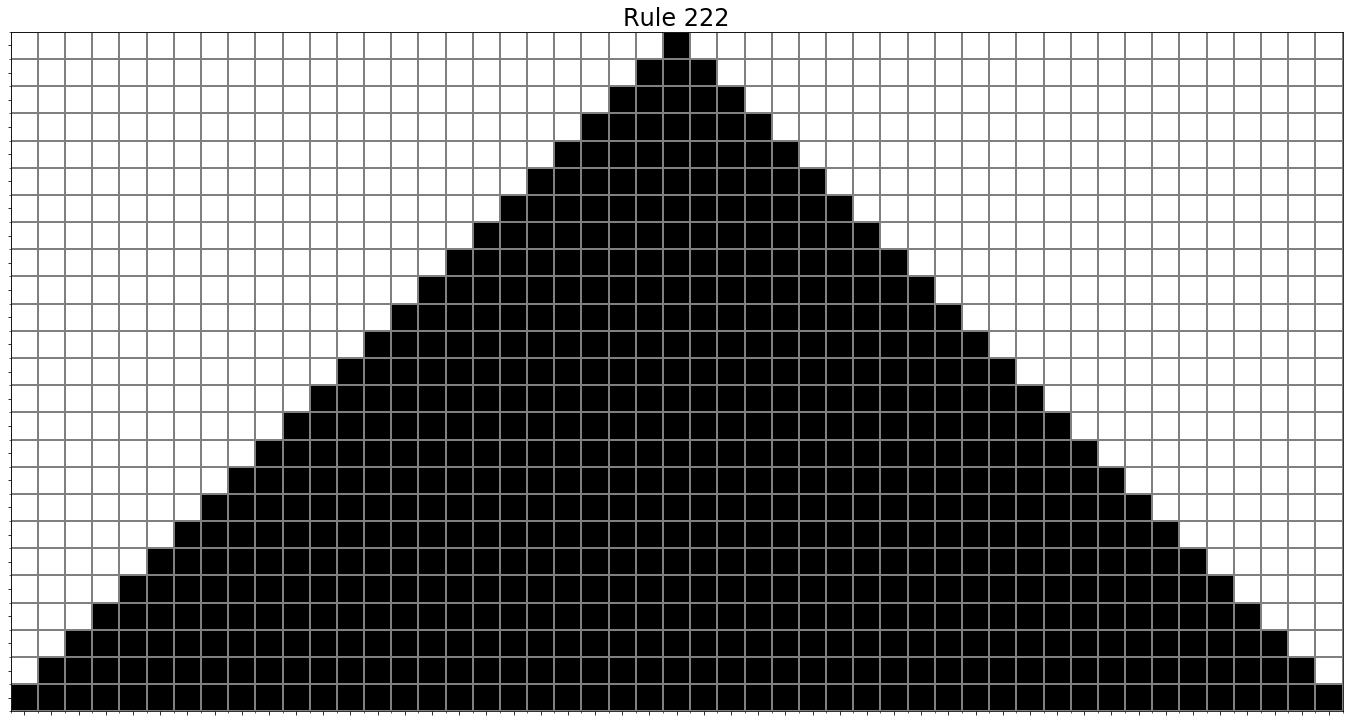

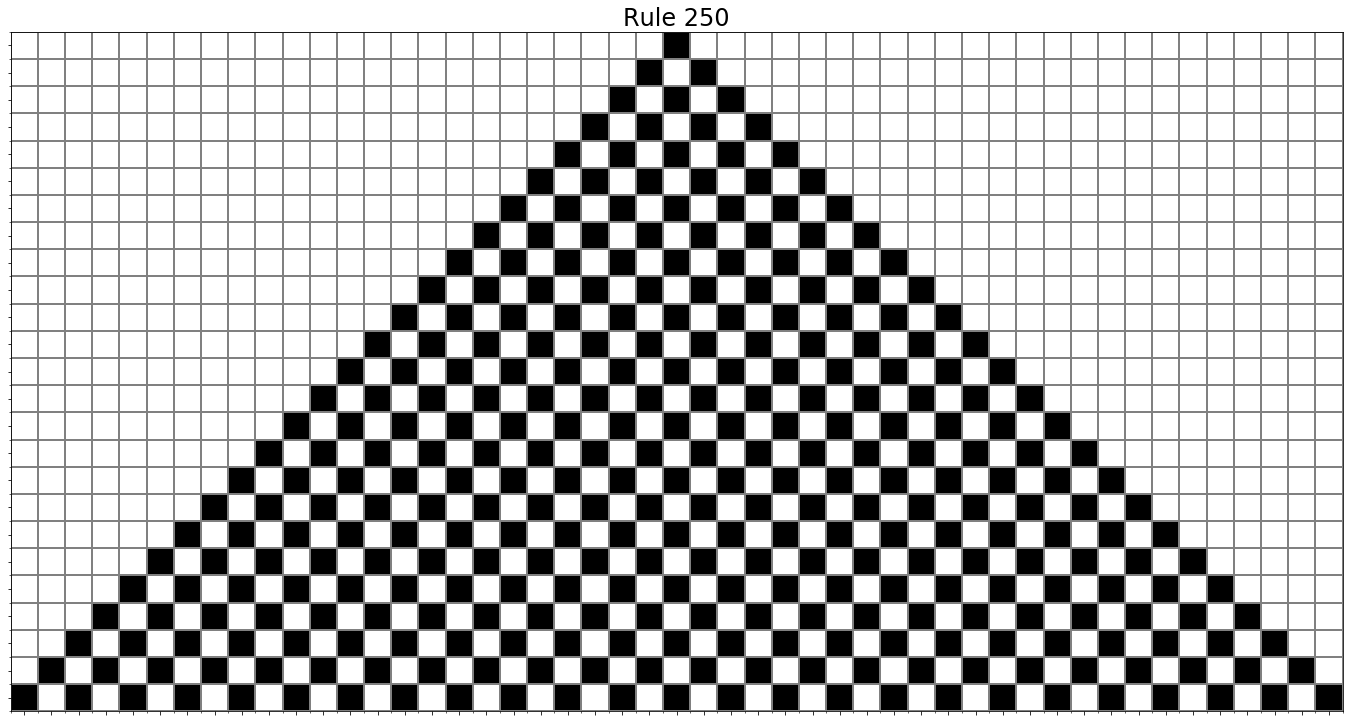

In [4]:
initial = np.zeros(49)
initial[24] = 1

rules = [
    30,
    54,
    60,
    62,
    90,
    94,
    102,
    110,
    122,
    126,
    150,
    158,
    182,
    188,
    190,
    220,
    222,
    250,
]

for rule in rules:
    states = wolfram_ca(rule, initial, steps=24)
    ax = plot_ca(states, rule)
    plt.savefig(f"../images/{rule}.png")